# NLP - Unsupervised Learning Project: Identifying conversation themes regarding covid-19 vaccines on Twitter

## Ignasi Sols

In [172]:
# importing libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import snscrape.modules.twitter as sntwitter
import pickle

import spacy
import contextualSpellCheck
import re



In [58]:
# Load pickle file again:
with open('tweets_project_covid_1M_before_11_07_2021_until_10_19_21AT13_32_38.pickle','rb') as read_file:
    tweets_df = pickle.load(read_file)

In [59]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499931 entries, 0 to 499930
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   Datetime  499931 non-null  datetime64[ns, UTC]
 1   Tweet Id  499931 non-null  int64              
 2   Text      499931 non-null  object             
 3   User_ID   499931 non-null  int64              
 4   Username  499931 non-null  object             
 5   language  499931 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 22.9+ MB


In [61]:
tweets_df.tail()

,Datetime,Tweet Id,Text,User_ID,Username,language
499926,2021-10-19 12:57:51+00:00,1450446093880266752,"eek looks like covid got into the household, i...",978751833362624512,Rishhie,en
499927,2021-10-19 12:57:50+00:00,1450446091522961410,@vivekagnihotri @narendramodi Yes sir you are ...,964479219375001600,ccredited_,en
499928,2021-10-19 12:57:49+00:00,1450446085789560837,Cabinet to examine proposal for digital COVID-...,2443768622,LoopJamaica,en
499929,2021-10-19 12:57:49+00:00,1450446084296355843,The Central government today asked all states ...,1303327690120781824,INDIAFIRSTPAPER,en
499930,2021-10-19 12:57:48+00:00,1450446080093605888,"Event 201,John Hopkins for Health Security/par...",3403127757,concetta8631,en


In [70]:
tweets_df['Text'].nunique()

493331

In [55]:

tweets_df.to_csv('tweets_covid_project.csv',index=False)
# df.to_csv("/path/to/file.csv",index=False,sep="\\", encoding='utf-8', quoting=csv.QUOTE_NONNUMERIC)


In [65]:
# # tweets_df = pd.read_csv('tweets_covid.csv')

# tweets_df = pd.read_csv('tweets_covid_project.csv')


In [67]:
tweets_df.drop_duplicates(subset='Text', keep="first", inplace=True)

In [68]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493331 entries, 0 to 499930
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   Datetime  493331 non-null  datetime64[ns, UTC]
 1   Tweet Id  493331 non-null  int64              
 2   Text      493331 non-null  object             
 3   User_ID   493331 non-null  int64              
 4   Username  493331 non-null  object             
 5   language  493331 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 26.3+ MB


# PREPROCESSING WITH SPACY - FINAL

,Datetime,Tweet Id,Text,User_ID,Username,language
499926,2021-10-19 12:57:51+00:00,1450446093880266752,"eek looks like covid got into the household, i...",978751833362624512,Rishhie,en
499927,2021-10-19 12:57:50+00:00,1450446091522961410,@vivekagnihotri @narendramodi Yes sir you are ...,964479219375001600,ccredited_,en
499928,2021-10-19 12:57:49+00:00,1450446085789560837,Cabinet to examine proposal for digital COVID-...,2443768622,LoopJamaica,en
499929,2021-10-19 12:57:49+00:00,1450446084296355843,The Central government today asked all states ...,1303327690120781824,INDIAFIRSTPAPER,en
499930,2021-10-19 12:57:48+00:00,1450446080093605888,"Event 201,John Hopkins for Health Security/par...",3403127757,concetta8631,en


In [605]:
tweets_df.reset_index(inplace=True,drop=True) # I had to do this due to a problem with the indexes.


In [611]:
tweets_df.drop(['index'], axis=1,inplace = True)

In [614]:
tweets_df.tail()

,Datetime,Tweet Id,Text,User_ID,Username,language
493326,2021-10-19 12:57:51+00:00,1450446093880266752,"eek looks like covid got into the household, i...",978751833362624512,Rishhie,en
493327,2021-10-19 12:57:50+00:00,1450446091522961410,@vivekagnihotri @narendramodi Yes sir you are ...,964479219375001600,ccredited_,en
493328,2021-10-19 12:57:49+00:00,1450446085789560837,Cabinet to examine proposal for digital COVID-...,2443768622,LoopJamaica,en
493329,2021-10-19 12:57:49+00:00,1450446084296355843,The Central government today asked all states ...,1303327690120781824,INDIAFIRSTPAPER,en
493330,2021-10-19 12:57:48+00:00,1450446080093605888,"Event 201,John Hopkins for Health Security/par...",3403127757,concetta8631,en


In [613]:
preprocess_df = tweets_df.copy()

In [181]:
nlp = spacy.load('en_core_web_lg')
nlp.Defaults.stop_words |= {"COVID-19","covid19","covid-19","covid","year","years","tweet","twitter","covidvaccine"}
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
# contextualSpellCheck.add_to_pipe(nlp) # Takes a lot of time!


In [212]:
def preprocessor2(token_lemma):
    token_lemma_processed = re.sub("(@[^\s]+)|(#[^\s]+)"," ", token_lemma) # Removes mentions, hashtags.
    token_lemma_processed = re.sub('[\W]+', '', token_lemma_processed) #  All the non word characters can be removed by ‘[\W]+’
    token_lemma_processed = re.sub(r"\b[0-9]+\b\s*", "", token_lemma_processed) # Remove numbers.
    token_lemma_processed = " ".join(token_lemma_processed.split()) # Remove extra spaces, tabs, and line breaks
    token_lemma_processed = re.sub(r"http\S+", "", token_lemma_processed)
    return token_lemma_processed




In [468]:
def spacy_tokenizer_lowercase_lemmatizer_preprocessing_2(Text):
    # transform to lowercase
    Text = nlp(Text.lower())
    # Lemmatize
    lemmatized = list()
    for token in Text:
        if token.is_stop is False not in spacy_stopwords: #not token.is_stop or not token.pos_ == 'punct': # and not token.pos_ =='DET': # do not include punctuations.
            if token.is_punct is False: #remove punctuations
                if token.pos_ != 'DATE' and token.pos_ != 'VERB': # we are removing verbs as well. 
                    token_preprocessed = preprocessor2(token.lemma_)
                    if token_preprocessed != '':
                        lemmatized.append(token_preprocessed.strip()) # we remove white spaces. lemmatized.append(token.lemma_.strip()) # we remove white spaces.
    
    return " ".join(lemmatized)





## Matrix factorization:

In [522]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # Better TfidfVectorizer with LSA and NMF, counter
from sklearn.decomposition import NMF
from copy import deepcopy

In [615]:
# 10000 rows:
data_input10000 = deepcopy(preprocess_df.iloc[0:10000]) #.copy()

In [616]:
data_input10000.

,Datetime,Tweet Id,Text,User_ID,Username,language
0,2021-11-07 23:59:53+00:00,1457498071772942340,Daughter Of Hollywood Actors Opens Up About He...,1205109494700806144,taxineil3,en
1,2021-11-07 23:59:47+00:00,1457498045311037440,"IDGAF about football, but watching Aaron Rodge...",41478103,MichaelDrummey,en
2,2021-11-07 23:59:45+00:00,1457498036612042752,"11 doctors injured by COVID vaccine go public,...",806196780887113728,VictorGStack1,en
3,2021-11-07 23:59:41+00:00,1457498021491617794,Chris Rock Slams NBA Star Kyrie Irving As “F—i...,3149041414,BoundingComics,en
4,2021-11-07 23:59:39+00:00,1457498012901691397,@Cottonwood331 @JoelWA384 You have literally n...,147644981,TheColeberg,en
...,...,...,...,...,...,...
9995,2021-11-07 15:46:14+00:00,1457373838602166273,I’m excited to get my #COVID-19 #vaccine and a...,1259231239124299776,FoutsAva,en
9996,2021-11-07 15:46:13+00:00,1457373833921503235,Great news!\n\nFederal Court Blocks Biden Admi...,825765966969700353,goralski_angela,en
9997,2021-11-07 15:46:12+00:00,1457373831820193805,The FDA has approved Pfizer's COVID vaccine fo...,18435438,channel1atlanta,en
9998,2021-11-07 15:46:07+00:00,1457373810815119363,Ted Cruz leads right-wing attack on Big Bird f...,1416435855338606592,NowYouReadMe1,en


In [525]:
vec = TfidfVectorizer(min_df=5,  # This is default; this is just a reminder it exists #  better 5-10. (I had it at 1 for the MVP). 
                      max_df=0.5,
                      max_features = 1000,
                      preprocessor=spacy_tokenizer_lowercase_lemmatizer_preprocessing_2)

In [526]:
doc_term = vec.fit_transform(data_input10000.Text) # outputs a sparse matrix.


In [ ]:
doc_term.toarray()

In [505]:
type(doc_term)

scipy.sparse.csr.csr_matrix

In [486]:
doc_term.shape

(10000, 1000)

# Topic modeling - 5 topics (final choice)

### NMF

In [711]:
doc_term_df = pd.DataFrame(doc_term.toarray(), columns = vec.get_feature_names_out())
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_term)
df_doc_topics = pd.DataFrame(doc_topic.round(5),columns = ["India","about_unvaccinated","Republican-antivax","Kids_shots","vaccine_mandates"])


/Users/ignasisols/opt/anaconda3/envs/metis_NLP_unsupervised/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [541]:
df_doc_topics

,India,Pro-vaccines,Republican-antivax,Kids_shots,vaccine_mandates
0,0.00000,0.00814,0.00039,0.00752,0.00653
1,0.00000,0.01691,0.00393,0.00638,0.00312
2,0.00000,0.01438,0.00000,0.03229,0.00150
3,0.00000,0.00144,0.00067,0.00132,0.00098
4,0.00000,0.02617,0.00000,0.01461,0.00002
...,...,...,...,...,...
9995,0.00000,0.00112,0.00351,0.00377,0.00093
9996,0.00000,0.00000,0.00000,0.00000,0.20993
9997,0.00000,0.00000,0.00187,0.08216,0.00000
9998,0.00000,0.00047,0.23392,0.00000,0.00000


In [514]:
# Create a new DataFrame that assignes the topic with a higher score to each document:

In [494]:
doc_term.shape

(10000, 1000)

In [638]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["India","Pro-vaccines","Republican-antivax","Kids_shots","vaccine_mandates"],
             columns = vec.get_feature_names())
topic_word

/Users/ignasisols/opt/anaconda3/envs/metis_NLP_unsupervised/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1st,2nd,3rd,aaron,aaronrodger,ability,able,absolute,absolutely,access,...,wtf,ya,yeah,yes,yesterday,yo,york,young,yr,zero
India,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Pro-vaccines,0.013,0.009,0.015,0.092,0.011,0.009,0.029,0.015,0.053,0.024,...,0.014,0.015,0.072,0.116,0.014,0.013,0.000,0.058,0.013,0.073
Republican-antivax,0.000,0.000,0.000,0.019,0.001,0.000,0.000,0.000,0.039,0.000,...,0.000,0.004,0.000,0.000,0.006,0.000,0.038,0.000,0.001,0.000
Kids_shots,0.028,0.018,0.020,0.032,0.000,0.005,0.031,0.006,0.026,0.010,...,0.011,0.004,0.015,0.056,0.022,0.013,0.013,0.260,0.018,0.046
vaccine_mandates,0.000,0.002,0.002,0.030,0.002,0.006,0.008,0.004,0.002,0.004,...,0.006,0.015,0.007,0.020,0.000,0.000,0.036,0.000,0.005,0.001


In [675]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(nmf_model, vec.get_feature_names_out(), 30)

Trying more:

### Word cloud for each topic:

In [622]:
corpus_word_cloud= deepcopy(data_input10000)

In [623]:
# First, we add the pre-processed tweet in a new column.
for i in range(len(data_input10000)):
    corpus_word_cloud.at[i,'preprocessed_tweet'] = spacy_tokenizer_lowercase_lemmatizer_preprocessing_2(corpus_word_cloud['Text'].iloc[i])
    

In [712]:
# Add new column that has the information regarding which topic is the one assigned to the tweet:
for i in range(len(corpus_word_cloud)):
    corpus_word_cloud.at[i,'Topic_assigned'] = df_doc_topics.loc[i,'India':'vaccine_mandates'].idxmax()
    

In [714]:
corpus_word_cloud.head()

,Datetime,Tweet Id,Text,User_ID,Username,language,preprocessed_tweet,Topic_assigned
0,2021-11-07 23:59:53+00:00,1457498071772942340,Daughter Of Hollywood Actors Opens Up About He...,1205109494700806144,taxineil3,en,daughter hollywood actor health problem vaccin...,about_unvaccinated
1,2021-11-07 23:59:47+00:00,1457498045311037440,"IDGAF about football, but watching Aaron Rodge...",41478103,MichaelDrummey,en,football aaron rodgers talk anti vaccine alter...,about_unvaccinated
2,2021-11-07 23:59:45+00:00,1457498036612042752,"11 doctors injured by COVID vaccine go public,...",806196780887113728,VictorGStack1,en,doctor vaccine public cdc fda risk,Kids_shots
3,2021-11-07 23:59:41+00:00,1457498021491617794,Chris Rock Slams NBA Star Kyrie Irving As “F—i...,3149041414,BoundingComics,en,chris rock nba star kyrie irving f ing dumb va...,about_unvaccinated
4,2021-11-07 23:59:39+00:00,1457498012901691397,@Cottonwood331 @JoelWA384 You have literally n...,147644981,TheColeberg,en,literally reason afraid vastly vastly likely b...,about_unvaccinated


In [707]:
# WORD CLOUD

from wordcloud import WordCloud

def create_wordcloud(wordcloud_series,topic):
    df_text = ' '.join(str(wordcloud_series).lower() for v in wordcloud_series)
    wordcloud = WordCloud(stopwords = None, random_state = 20, background_color = 'white',
                      collocations=True).generate(df_text)
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.savefig(f'wordcloud_{topic}.pdf',dpi=600)
    plt.show()


,preprocessed_tweet
2,doctor vaccine public cdc fda risk
5,measle vaccine similar
14,clear vaccine available area time soon
15,clearly misinformation lie vaccine new scienti...
17,calculation january dose vaccine probably pfiz...
...,...
9985,vaccine booster shot tomorrow
9991,nov article 4th shot boston doctor vaccine imm...
9995,excited vaccine little nervous needle haha
9997,fda pfizer vaccine child aged


In [674]:
corpus_word_cloud[corpus_word_cloud['Topic_assigned'] == topic]['preprocessed_tweet']

18          biden state biden administration vaccine rule
20               federal law employer vaccination vaccine
33      thousand vaccine passport german riot police r...
52      point government primary role safety citizen v...
59        jan date biden vaccine mandate retailer shipper
                              ...                        
9979    icymi absurd abuse power oklahoma attorney gen...
9980    completely pandemic infact brandon trump xenop...
9984    to6 testing mandate actual vaccine jab old lon...
9992                          teacher vaccine status test
9996    great news federal court blocks biden administ...
Name: preprocessed_tweet, Length: 1370, dtype: object

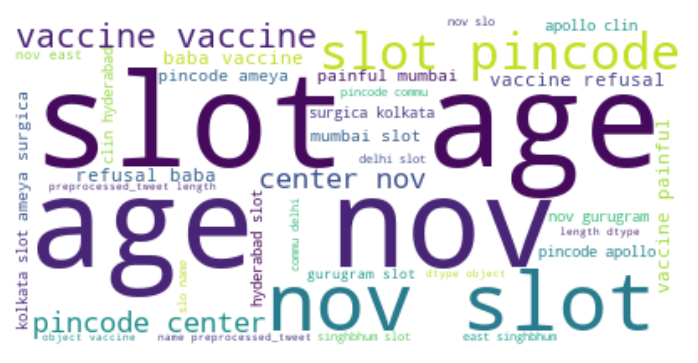

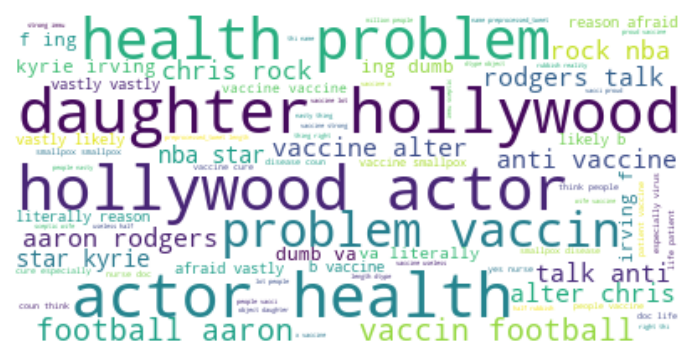

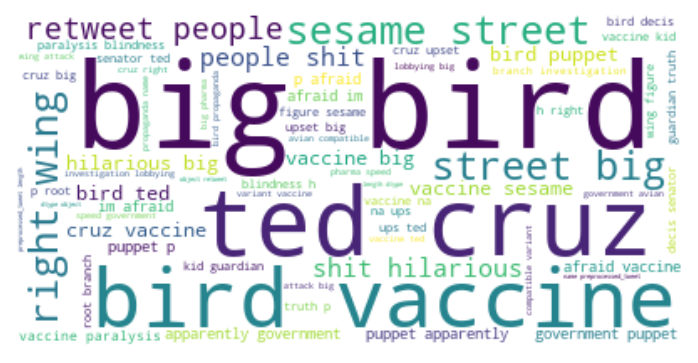

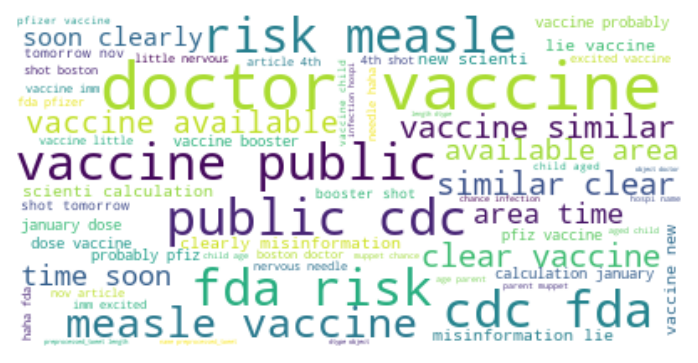

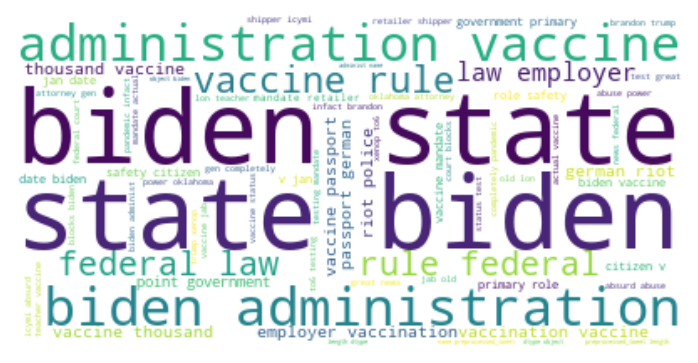

In [715]:
five_topics = ["India","about_unvaccinated","Republican-antivax","Kids_shots","vaccine_mandates"]

for topic in five_topics:
    create_wordcloud(corpus_word_cloud[corpus_word_cloud['Topic_assigned'] == topic]['preprocessed_tweet'],topic)
    
    


In [717]:
# Plot number of tweets per topic:
corpus_word_cloud['Topic_assigned'].value_counts()

pandas.core.series.Series

In [789]:

from plotnine import ggplot,geom_bar,geom_text, aes, after_stat, theme, element_text,coord_flip

In [792]:
corpus_word_cloud2 = deepcopy(corpus_word_cloud.copy())

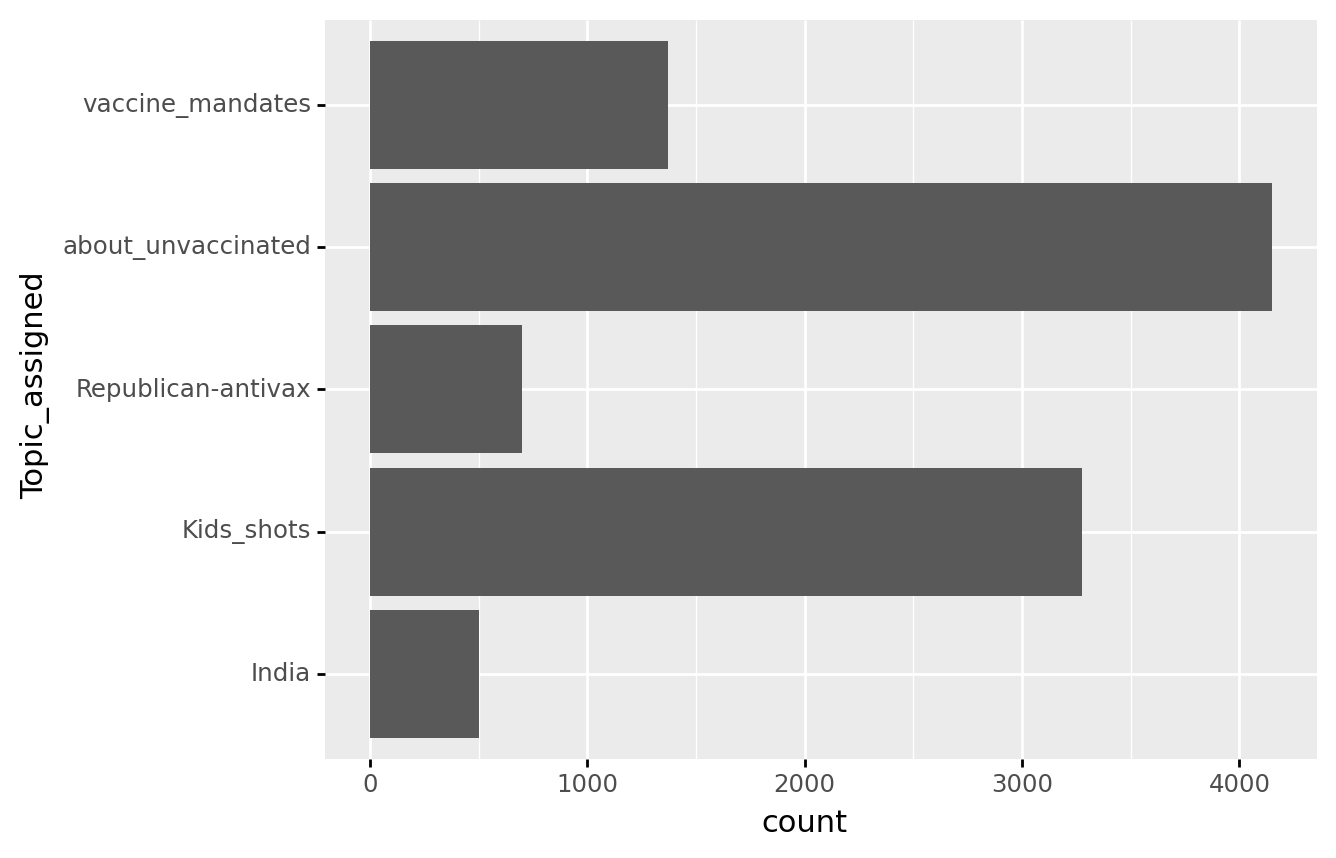

<ggplot: (8766375443935)>

In [791]:
corpus_word_cloud2.assign(column = pd.Categorical(corpus_word_cloud2.column, corpus_word_cloud2.column))

(ggplot(corpus_word_cloud, aes('Topic_assigned'))
 + geom_bar()
 + coord_flip())



# + theme(axis_text_x=element_text(rotation=45, hjust=1))
# p = ggplot(data = corr, mapping = aes(x='reorder(var2, value)', y='value'))


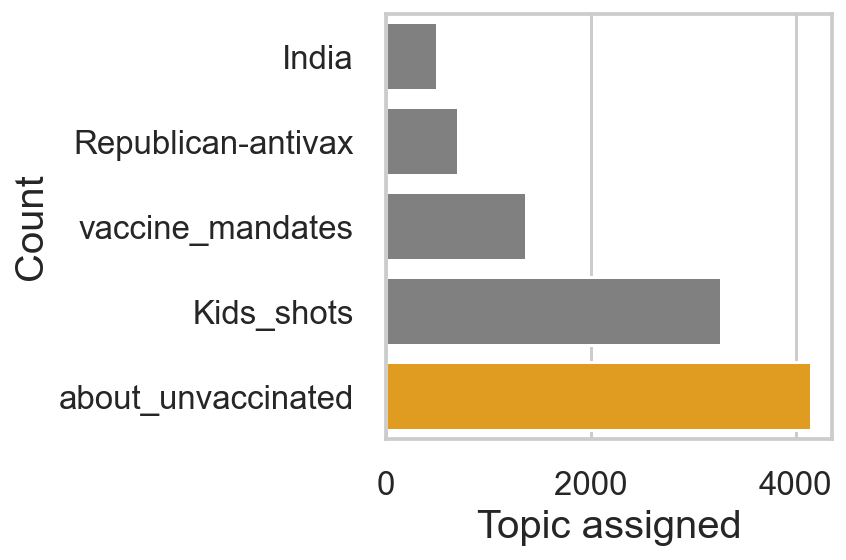

In [1052]:
clrs = ["grey" if x!='about_unvaccinated' else 'orange' for x in ["India","Republican-antivax","vaccine_mandates","Kids_shots", 'about_unvaccinated']]

ax = sns.countplot(y="Topic_assigned", data=corpus_word_cloud, 
            order=["India","Republican-antivax","vaccine_mandates","Kids_shots", 'about_unvaccinated'],palette=clrs) #Show count of observations
ax.set_xlabel("Topic assigned",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.tight_layout()
plt.savefig('topics_count.pdf',dpi=100)

In [659]:
df_text = ' '.join(str(topic_series_temp).lower() for v in topic_series_temp)

In [661]:
df_text

948039

In [386]:
# document = "https://t.co/oyocahp7qa, @Pepe, #Come, 12 45, One year ago,   I visited the Eiffel Tower with Jeff in Paris, France. I just went to the Wynn today: I'm so happy I went to this awesome Vegas buffet! years 2020 and 2021. I can't eat more"
# spacy_tokenizer_lowercase_lemmatizer_preprocessing_2(document)


# k-means clustering (5 topics)

In [ ]:
from sklearn.cluster import KMeans

In [937]:
# Convert dataFrame to matrix.
mat = df_doc_topics.values
km = KMeans(n_clusters = 7,random_state=100,n_init=10)
km.fit(mat)

# Get cluster assignment labels: 
df_doc_topics_clusters = df_doc_topics.copy()
df_doc_topics_clusters['Cluster'] = km.labels_
df_doc_topics_clusters.Cluster.value_counts()

4    6156
5    1243
1    1178
0     470
3     381
6     288
2     284
Name: Cluster, dtype: int64

In [938]:
df_clusters = df_doc_topics_clusters.groupby(['Cluster']).median()
df_clusters

,India,about_unvaccinated,Republican-antivax,Kids_shots,vaccine_mandates
Cluster,,,,,
0,0.00000,0.00000,0.00000,0.000000,0.126655
1,0.00000,0.00319,0.00000,0.065240,0.000200
2,0.23419,0.00000,0.00000,0.000000,0.000000
3,0.00000,0.00000,0.19061,0.000000,0.000000
4,0.00000,0.00920,0.00000,0.007290,0.002590
5,0.00000,0.05842,0.00000,0.000000,0.000000
6,0.00000,0.00000,0.00000,0.141925,0.000000


In [437]:
# Elbow metric

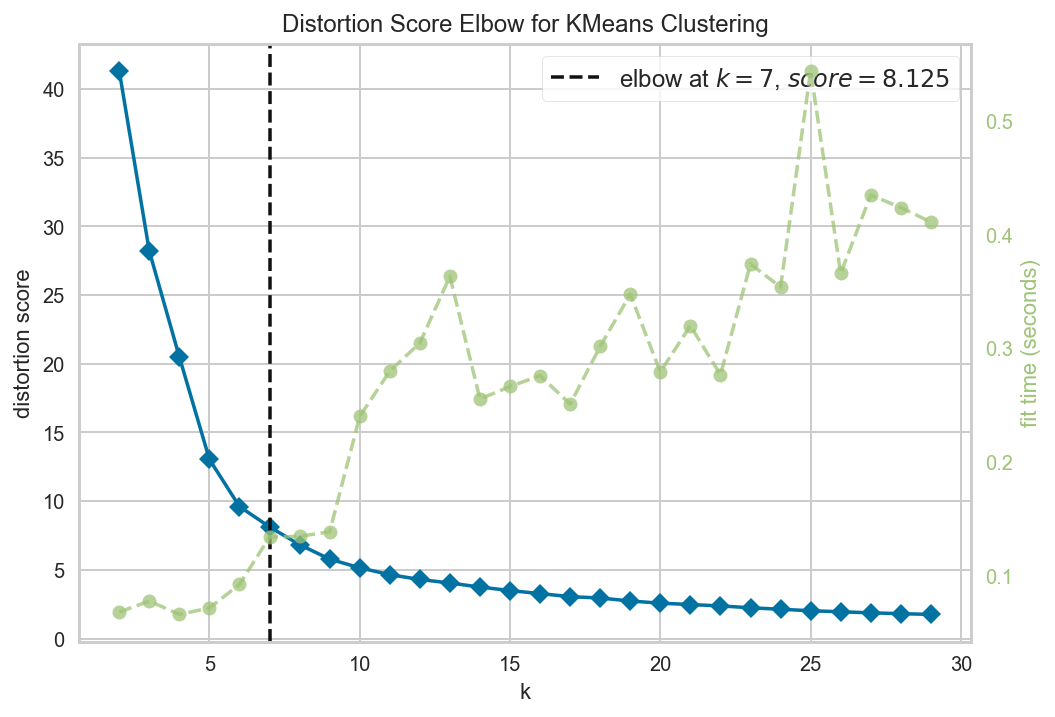

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [443]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(km, k=(2,30), timings= True)
visualizer.fit(mat)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

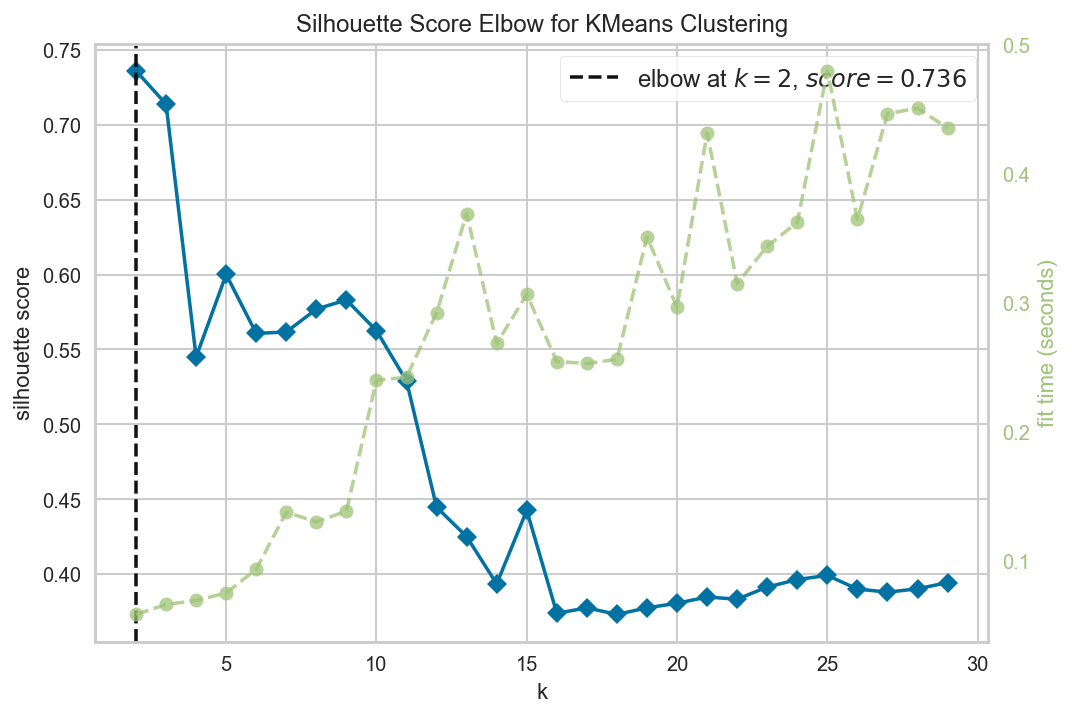

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [445]:
# Silhouette Score for K means

# k is range of number of clusters.
visualizer = KElbowVisualizer(km, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(mat)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [836]:
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
import matplotlib.pyplot as plt

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")


plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")


# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    figure(figsize=(12, 6), dpi=80)
    
    color = ['b','m','r','c','g','y','k',] # blue, magenta, red, cyan, green, yellow, black  ---- 'skyblue','lime','fuchsia','skyblue'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

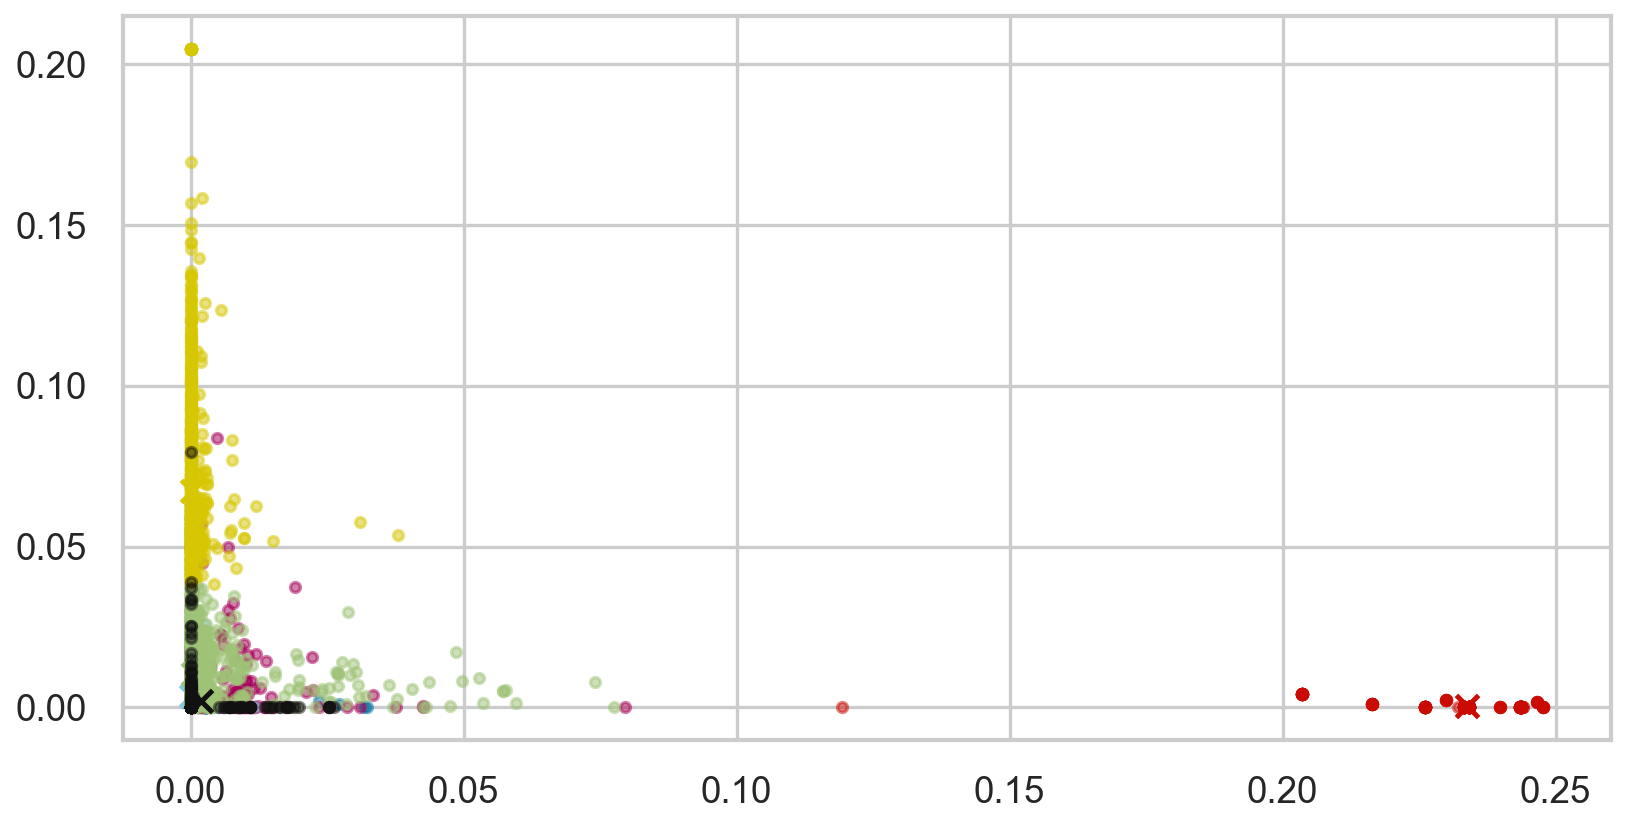

In [837]:
num_clusters = 7
display_cluster(doc_topic,km,num_clusters)

# PUT a title. EXPLAIN IT.LEGEND, 

In [1048]:
from sklearn.metrics import pairwise_distances

top_3_docs = pairwise_distances([[num[0] for num in df_clusters.iloc[0].values.reshape(-1, 1).tolist()]], \
                                df_doc_topics,metric='euclidean').argsort()[0, :3]
corpus_word_cloud['Cluster']=km.labels_

In [1050]:
corpus_word_cloud['Text'].iloc[top_3_docs[2]]

'@MrAndyNgo Lol, Covid-19 vaccine mandate is the exact definition of fascism. How ironic! 🤦\u200d♂️'

In [963]:
df_doc_topics.iloc[top_3_docs[1]]

India                 0.00000
about_unvaccinated    0.05841
Republican-antivax    0.00000
Kids_shots            0.00000
vaccine_mandates      0.00000
Name: 5669, dtype: float64

In [1062]:
df_clusters.rename(columns = {'Republican-antivax':'Sesame_street_bird'})

,India,about_unvaccinated,Sesame_street_bird,Kids_shots,vaccine_mandates
Cluster,,,,,
0,0.00000,0.00000,0.00000,0.000000,0.126655
1,0.00000,0.00319,0.00000,0.065240,0.000200
2,0.23419,0.00000,0.00000,0.000000,0.000000
3,0.00000,0.00000,0.19061,0.000000,0.000000
4,0.00000,0.00920,0.00000,0.007290,0.002590
5,0.00000,0.05842,0.00000,0.000000,0.000000
6,0.00000,0.00000,0.00000,0.141925,0.000000


# DBSCAN

In [447]:
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn")
%matplotlib inline

In [448]:
def get_data(k,num_points=100):
    np.random.seed(9)
    data = []
    for i in range(0,k):
        for _ in range(0,num_points):
            data.append([np.random.normal(6*i),np.random.normal(i)])
    x1,y1 = zip(*data)
    #plt.xlabel('X')
    #plt.ylabel('Y')
    #plt.scatter(x1,y1)
    return data

In [678]:
# # Standardize our data for DBSCAN and fit DBSCAN
# X = StandardScaler().fit_transform(mat)
# db = DBSCAN(eps=0.15, min_samples=3).fit(X)

# # Let's find the observations DBSCAN called "core"
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# unique_labels = set(labels)
# colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
# plt.figure(dpi=200)
# show_core = True
# show_non_core = True
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = 'k'

#     class_member_mask = (labels == k)
#     if show_core:
#         xy = X[class_member_mask & core_samples_mask]
#         x, y = xy[:,0], xy[:,1]
#         plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1) # add black border for core points
    
#     if show_non_core:
#         xy = X[class_member_mask & ~core_samples_mask]
#         x, y = xy[:,0], xy[:,1]
#         plt.scatter(x, y, c=col, s=20, linewidths=1.1)

# plt.title('Estimated number of clusters: %d' % n_clusters_);

In [ ]:
Cluster Interpretation:

In [690]:
vec2 = TfidfVectorizer(min_df=1,  # This is default; this is just a reminder it exists #  better 5-10. (I had it at 1 for the MVP). 
                      max_df=1.0,
                      max_features = 1000,
                      preprocessor=spacy_tokenizer_lowercase_lemmatizer_preprocessing_2)

In [697]:
# doc_term2 = vec2.fit_transform(data_input10000.Text) # outputs a sparse matrix.



In [695]:
doc_term_df2 = pd.DataFrame(doc_term2.toarray(), columns = vec2.get_feature_names_out())
nmf_model2 = NMF(6)
doc_topic2 = nmf_model2.fit_transform(doc_term2)
# df_doc_topics2 = pd.DataFrame(doc_topic2.round(5),columns = ["India","Pro-vaccines","Republican-antivax","Kids_shots","vaccine_mandates"])



/Users/ignasisols/opt/anaconda3/envs/metis_NLP_unsupervised/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [687]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# OTHER NUMBER OF TOPICS) - not chosen

# 6 topics: it seems the best option so far.

In [390]:
nmf_model_6 = NMF(6)
doc_topic_6 = nmf_model_6.fit_transform(doc_term)
display_topics(nmf_model_6, vec.get_feature_names_out(), 30)




Topic  0
slot, pincode, nov, center, age, mumbai, nh, ameya, surgical, general, pmc, multispeci, pune, ho, kolkata, hyderabad, site, gurugram, uphc, laxmi, nagar, singhbhum, hospital, east, community, delhi, kapur, dr, burari, nurse

Topic  1
people, death, like, amp, virus, immunity, booster, risk, time, effect, unvaccinated, case, flu, long, million, good, effective, hospital, way, thing, bad, dose, safe, anti, reaction, natural, right, likely, rate, mask

Topic  2
bird, big, cruz, ted, sesame, street, propaganda, character, right, government, wing, guardian, attack, icon, delight, gop, republican, sen, old, elmo, winger, kid, cnn, anti, pharma, smartnews, today, bigbird, new, little

Topic  3
kid, shot, booster, flu, school, age, parent, polio, like, today, time, clinic, young, old, family, week, question, day, available, risk, pfizer, adult, elementary, cdc, thing, dose, safe, month, life, guardian

Topic  4
mandate, biden, court, federal, business, administration, appeal, rule, w

/Users/ignasisols/opt/anaconda3/envs/metis_NLP_unsupervised/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [391]:
# 7 topics:
nmf_model_7 = NMF(7)
doc_topic_7 = nmf_model_7.fit_transform(doc_term)
display_topics(nmf_model_7, vec.get_feature_names_out(), 30)




Topic  0
slot, pincode, nov, center, age, mumbai, nh, ameya, surgical, general, pmc, pune, multispeci, ho, kolkata, hyderabad, site, gurugram, uphc, laxmi, nagar, singhbhum, hospital, east, community, delhi, kapur, dr, burari, nurse

Topic  1
people, unvaccinated, hospital, lot, thing, anti, right, sick, million, nurse, vaxxer, way, real, stupid, bad, uk, safe, wo, pandemic, healthy, virus, reaction, definition, like, likely, good, young, important, sense, person

Topic  2
bird, big, cruz, ted, sesame, street, propaganda, character, right, government, wing, guardian, attack, icon, delight, gop, republican, old, sen, elmo, winger, cnn, anti, today, smartnews, pharma, bigbird, new, little, news

Topic  3
kid, shot, school, age, parent, polio, young, clinic, today, question, family, flu, guardian, old, adult, available, elementary, ted, cruz, week, thing, sense, classroom, day, measle, dr, post, appointment, time, pain

Topic  4
mandate, biden, court, federal, business, administration, a

/Users/ignasisols/opt/anaconda3/envs/metis_NLP_unsupervised/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [392]:
# 8 topics:
nmf_model_8 = NMF(8)
doc_topic_8 = nmf_model_8.fit_transform(doc_term)
display_topics(nmf_model_8, vec.get_feature_names_out(), 30)




/Users/ignasisols/opt/anaconda3/envs/metis_NLP_unsupervised/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic  0
slot, pincode, nov, center, age, mumbai, nh, ameya, surgical, general, multispeci, pune, pmc, ho, kolkata, hyderabad, site, gurugram, nagar, uphc, laxmi, singhbhum, hospital, east, community, delhi, kapur, dr, burari, nurse

Topic  1
people, unvaccinated, hospital, thing, lot, anti, sick, right, million, like, nurse, vaxxer, way, bad, real, uk, stupid, wo, virus, safe, definition, pandemic, good, healthy, reaction, young, important, likely, sense, decision

Topic  2
bird, big, cruz, ted, sesame, street, propaganda, character, right, government, wing, guardian, attack, icon, delight, gop, republican, old, sen, elmo, winger, today, cnn, anti, pharma, smartnews, new, bigbird, little, news

Topic  3
kid, shot, age, school, parent, clinic, question, young, family, guardian, today, ted, old, cruz, polio, available, thing, adult, sense, risk, dr, time, pfizer, classroom, day, week, pain, cdc, heart, science

Topic  4
mandate, biden, court, federal, business, administration, appeal, 

# Kmeans

In [353]:
#######################
# standard code block #
######################


# import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

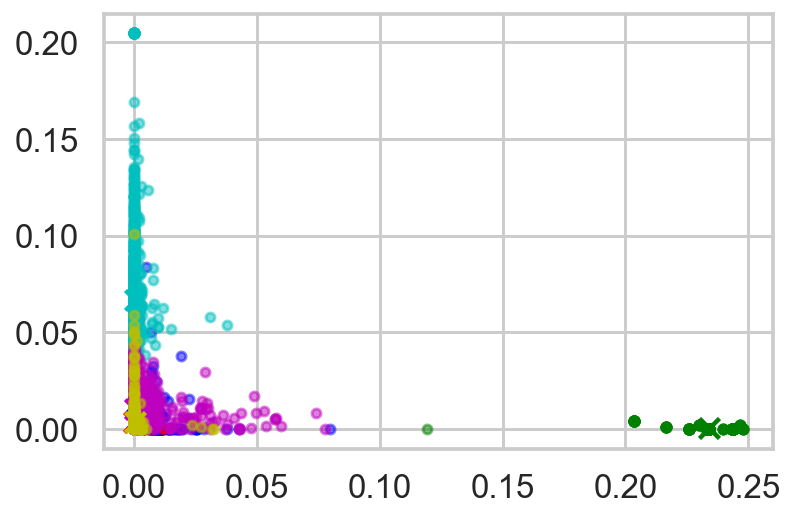

In [385]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters,random_state=100,n_init=10)
km.fit(doc_topic)
display_cluster(doc_topic,km,num_clusters)

In [228]:
km.inertia_

9068.77629670279

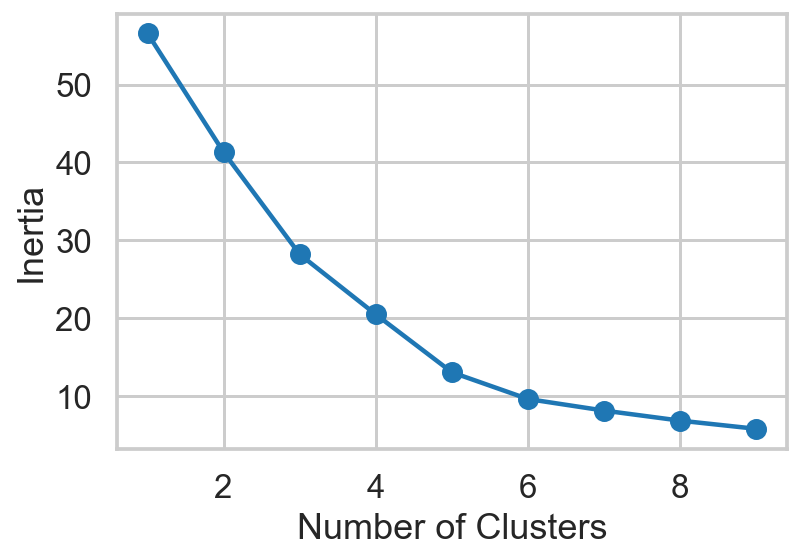

In [368]:
inertia = []
list_num_clusters = list(range(1,10))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(doc_topic)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

6 Topics - NMF:

IndexError: string index out of range

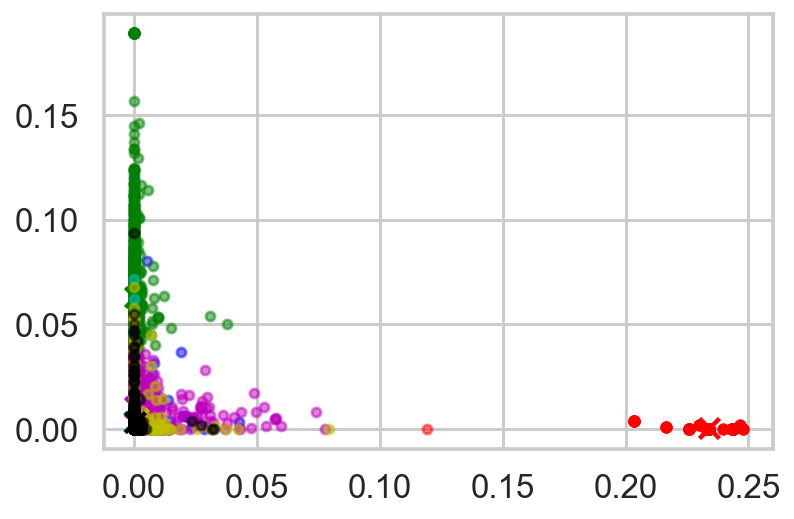

In [400]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters,random_state=100,n_init=10)
km.fit(doc_topic_6)
display_cluster(doc_topic_6,km,num_clusters)

# CorEx

In [840]:
# Corex
import scipy.sparse as ss
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [843]:
# doc_term = vec.fit_transform(data_input10000.Text) # outputs a sparse matrix.AGAN
words = list(np.asarray(vec.get_feature_names_out()))


In [895]:
len(words)

1000

In [869]:
# n_hidden is the number of topics
# words is your list of words used in your corpus
# I recommend adding docs=df.data to make it easier to check which sentences are in each resulting topic
topic_model = ct.Corex(n_hidden=7, words=words, seed=1)
topic_model.fit(doc_term, words=words, docs=data_input10000.Text)

In [870]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: slot,pincode,nov,center,court,biden,federal,general,surgeon,mandate
1: ted,cruz,bird,sesame,street,big,propaganda,integrity,whistle,character
2: aaron,rodgers,snl,partnership,prevea,comment,bay,green,packers,davidson
3: pregnant,woman,mum,plea,victim,bbc,pregnancy,husband,daughter,ability
4: dramatic,decline,coach,decision,district,office,protest,start
5: educator,elementary,key,approval,student,classroom,book,department,states
6: traveler,international,border,restriction,half,united,hopefully,liberal,picture,recipient


In [852]:
# Let's check out topic : graphics
topic_model.get_top_docs(topic=5, n_docs=2)

[('With the approval of the COVID-19 vaccine for younger children, many elementary schools are preparing to offer the shots, which educators see as key to keeping students learning in person and making the classroom experience closer to what it once was.\nhttps://t.co/uCPgRVijrM',
  -0.11608131220147799),
 ('With the approval of the COVID-19 vaccine for younger children, many elementary schools around the U.S. are preparing to offer the shots, which educators see as key to keeping students learning in person and making the classroom experience closer. \nhttps://t.co/iF1H13Z3nd',
  -0.12408271931468068)]

In [855]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(doc_term), columns=['topic'+str(i) for i in range(6)])
predictions.head()

,topic0,topic1,topic2,topic3,topic4,topic5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


### How do I determine how many topics I should have?

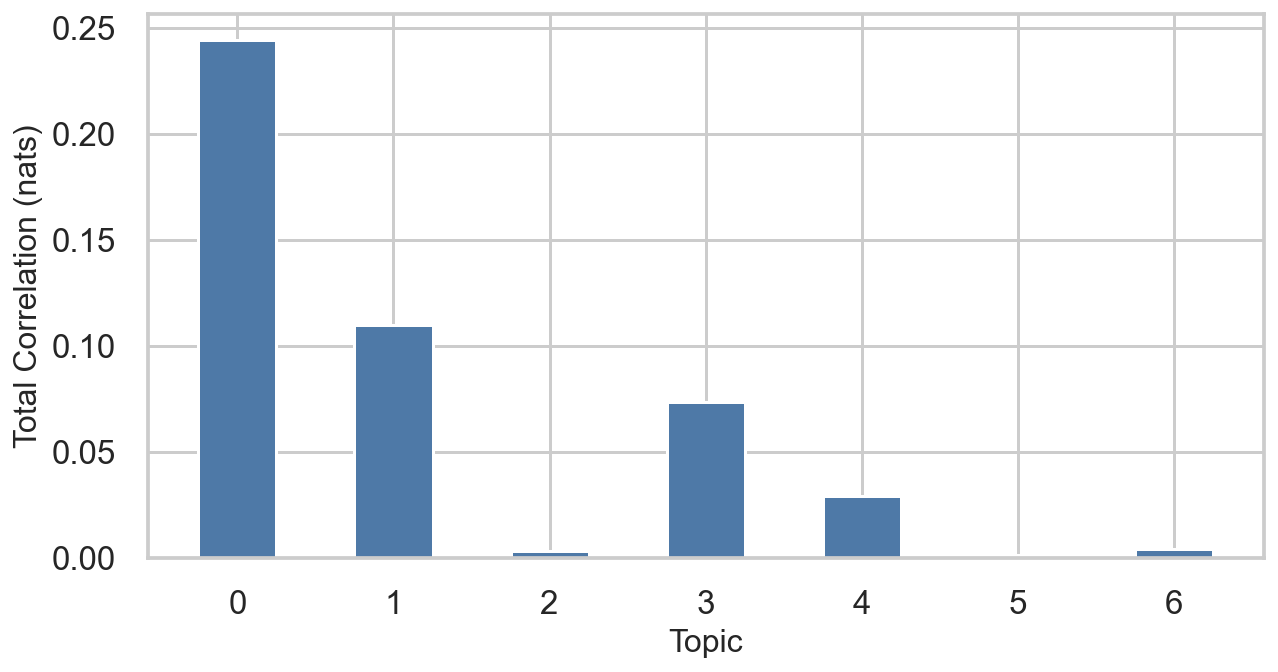

In [874]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [885]:
topic_model = ct.Corex(n_hidden=7, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_term, words=words, docs=data_input10000.Text, 
                anchors=[['slot', 'pincode'], 
                         ['cruz','bird'], 
                         ['kid','child'], 
                         ['mandate'],
                         ['unvaccinated'], 
                         ['booster']], anchor_strength=2)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: slot,pincode,nov,center,age,mumbai,ameya,nh,surgical,pmc
1: bird,cruz,big,ted,sesame,street,propaganda,character,wing,icon
2: child,kid,elementary,classroom,school,young,educator,approval,key,student
3: mandate,court,biden,appeal,federal,surgeon,business,pregnant,rule,mum
4: aaron,rodgers,snl,partnership,prevea,comment,bay,green,packers,davidson
5: effectiveness,percent,dramatic,decline,study,month,efficacy,veteran,additional,booster
6: whistle,integrity,researcher,data,trial,bmj,pfizer,issue,whistleblower,journal


In [882]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(doc_term), columns=['topic'+str(i) for i in range(7)])
predictions.head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [894]:
topic_model.get_top_docs(topic=6, n_docs=2)

[('Pfraud. Regional Director Brook Jackson, whistleblower:\n\nCovid-19: Researcher blows the whistle on data integrity issues in Pfizer’s vaccine trial | The BMJ https://t.co/Axp0M8qljI',
  -0.0006851656867365996),
 ('Covid-19: Researcher blows the whistle on data integrity issues in Pfizer’s vaccine trial | The BMJ https://t.co/6uT0ZWs5mL',
  -0.0009373325181920578)]

# k-means + corex

In [911]:
# doc_topic = nmf_model.fit_transform(doc_term)
# df_doc_topics = pd.DataFrame(doc_topic.round(5),columns = ["India","about_unvaccinated","Republican-antivax","Kids_shots","vaccine_mandates"])



In [896]:
doc_topic_corex = topic_model.fit_transform(doc_term)

In [906]:
df_doc_topics_corex = pd.DataFrame(doc_topic_corex,columns = ["India","Republican-antivax","children","mandate","aaron_rodgers_unvaccinated","boosters","bmj_pfizer"])



In [910]:
# Convert dataFrame to matrix.
mat_corex = df_doc_topics_corex.values
km_corex = KMeans(n_clusters = 7,random_state=100,n_init=10)
km_corex.fit(mat_corex)

# Get cluster assignment labels: 
df_doc_topics_clusters_corex = df_doc_topics_corex.copy()
df_doc_topics_clusters_corex['Cluster'] = km_corex.labels_
df_doc_topics_clusters_corex.Cluster.value_counts()

0    8084
2     656
4     322
1     320
3     286
5     224
6     108
Name: Cluster, dtype: int64

In [915]:
df_clusters_corex = df_doc_topics_clusters_corex.groupby(['Cluster']).mean()
df_clusters_corex

,India,Republican-antivax,children,mandate,aaron_rodgers_unvaccinated,boosters,bmj_pfizer
Cluster,,,,,,,
0,0.0,0.0,0.000000,0.007175,0.0,0.000000,0.00000
1,0.0,1.0,0.000000,0.000000,0.0,0.003125,0.00625
2,0.0,0.0,0.001524,0.000000,0.0,0.000000,1.00000
3,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000
4,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.00000
5,0.0,0.0,0.000000,0.000000,1.0,0.058036,0.00000
6,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.00000


In [916]:
df_doc_topics_clusters_corex

,India,Republican-antivax,children,mandate,aaron_rodgers_unvaccinated,boosters,bmj_pfizer,Cluster
0,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,0
3,False,False,False,False,False,True,False,6
4,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,0
9996,False,False,True,False,False,False,False,4
9997,False,False,False,False,False,False,False,0
9998,False,True,False,False,False,False,False,1


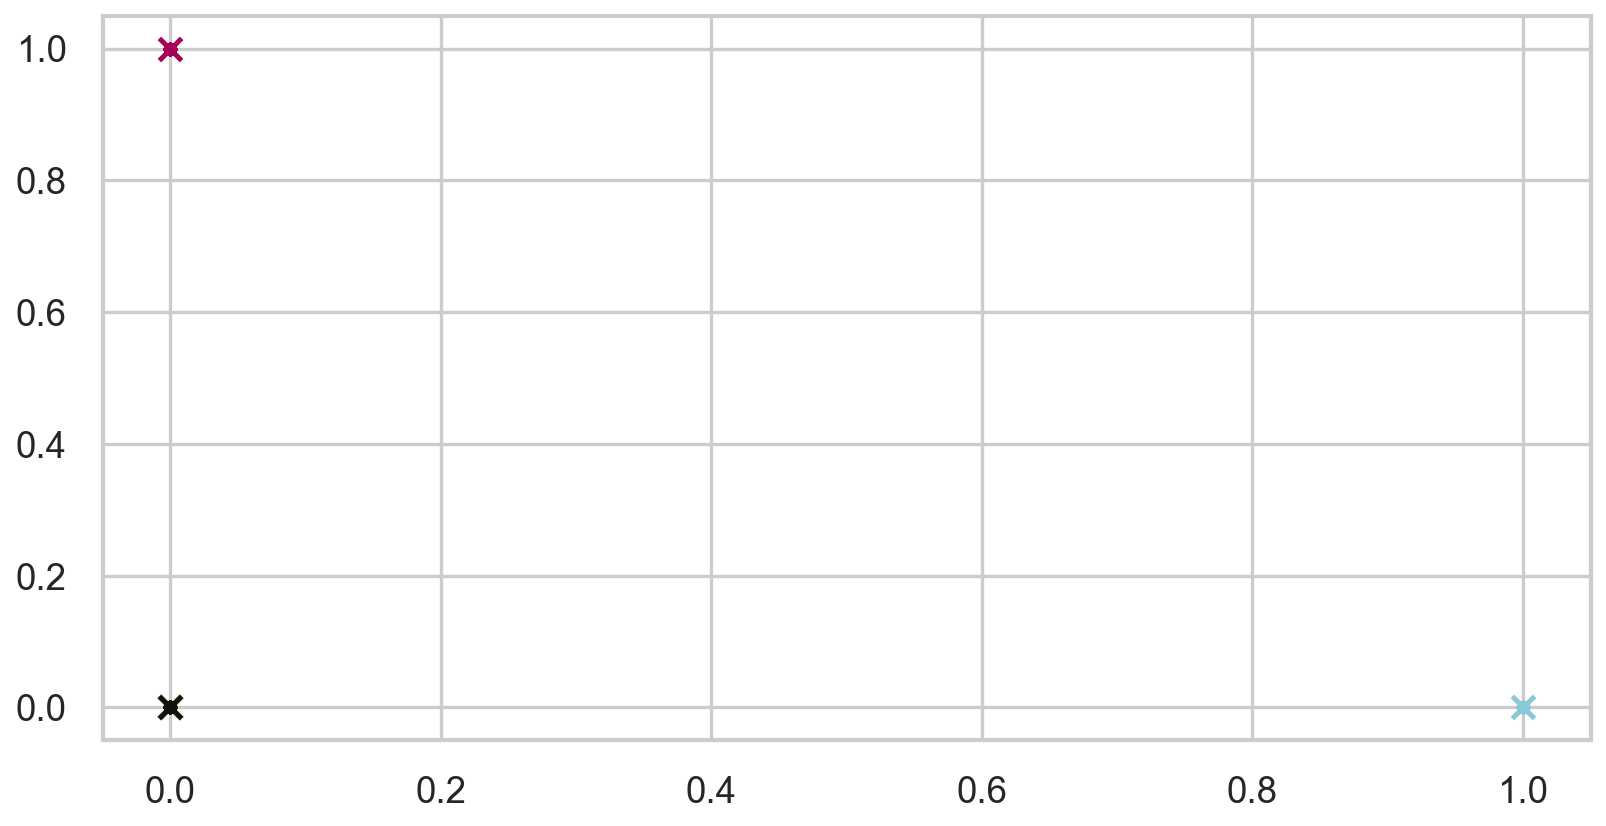

In [913]:
display_cluster(doc_topic_corex,km_corex,num_clusters=7)